# Coorelations of the v3 database 

Correlation matrices for the v3 database

v3 uses GRACE data with altitude (e.g., hasn't been normalized to 400 km)

## Purpose

- Identify the key features for new models 
- Remove features with high colinearity

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib qt

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
fn = 'D:\data\SatDensities\satdrag_database_grace_B_v3.hdf5'
df = pd.read_hdf(fn)
print(df.columns)

Index(['DateTime', 'DateTime_omni', 'Year', 'DOY', 'Hour', 'Minute', 'IMF_id',
       'SW_id', 'IMF_pt', 'SW_pt', 'Per_int', 'Timeshift', 'RMS_Timeshift',
       'RMS_PhaseFrontNormal', 'Time_btwn_observations', 'B', 'Bx_GSEGSM',
       'By_GSE', 'Bz_GSE', 'By_GSM', 'Bz_GSM', 'RMS_SD_B',
       'RMS_SD_field_vector', 'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho',
       'Tp', 'dynP', 'Esw', 'Beta', 'AlfvenMach', 'X(s/c), GSE', 'Y(s/c), GSE',
       'Z(s/c), GSE', 'BSN location, Xgse', 'BSN location, Ygse',
       'BSN location, Zgse', 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index', 'PC index', 'Na_Np Ratio',
       'MagnetosonicMach', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)',
       'DateTime_fism2', '225_00', '600_01', '1300_02', '2500_03', '5100_04',
       '11250_05', '18950_06', '25700_07', '30500_08', '43000_09', '59500_10',
       '72400_11', '72400_12', '85550_13', '85550_14', '85550_15', '

In [3]:
dens_col = 'dens_x'

fism_columns = ['225_00', '600_01', '1300_02', '2500_03', '5100_04',
            '11250_05', '18950_06', '25700_07', '30500_08', '43000_09', '59500_10',
            '72400_11', '72400_12', '85550_13', '85550_14', '85550_15', '94400_16',
            '94400_17', '94400_18', '98100_19', '100700_20', '103850_21',
            '113000_22']
fism_columns.append(dens_col)

omni_columns = ['B', 'Bx_GSEGSM', 'By_GSE', 'Bz_GSE', 'By_GSM', 'Bz_GSM', 
        'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho',
       'Tp', 'dynP', 'Esw', 'Beta', 'AlfvenMach'
       , 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index',
       'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)']
omni_columns.append(dens_col)

goes_columns = ['xrsa_flux_g15', 'xrsb_flux_g15','irr_1216']
goes_columns.append(dens_col)

In [4]:
# identify the storm and quiet times
st_t = (df['storm']>0.95) & (df['storm']<1.05) # storm times
qt_t = (df['storm']<0) # quiet times
mn_p = (df['storm phase']>0.95) & (df['storm phase']<1.05) # main phase
rc_p = (df['storm phase']>1.95) & (df['storm phase']<2.05) # recovery phase

In [5]:
qt_t.value_counts()
st_t.value_counts()

storm
False    628368
True     623067
Name: count, dtype: int64

storm
True     628368
False    623067
Name: count, dtype: int64

In [6]:
df = df[~df['irr_1216'].isna()]

### Generate correlation matrices

In [7]:
def cor_matrix(data, columns, dens_col, 
               qt_t,st_t,mn_p,rc_p):

    cor_plot = pd.DataFrame()
    cor_plot['All'] = data[columns].dropna().corr()[dens_col]
    cor_plot['Quiet'] = data[qt_t][columns].dropna().corr()[dens_col]
    cor_plot['Storm'] = data[st_t][columns].dropna().corr()[dens_col]
    cor_plot['Main'] = data[mn_p][columns].dropna().corr()[dens_col]
    cor_plot['Recovery'] = data[rc_p][columns].dropna().corr()[dens_col]

    return cor_plot

    

#### FISM Correlations

In [8]:
%matplotlib inline

In [9]:
c_fism = cor_matrix(df,fism_columns,dens_col,qt_t,st_t,mn_p,rc_p)

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Quiet'] = data[qt_t][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Storm'] = data[st_t][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Main'] = data[mn_p][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Recovery'] = data[rc_p][columns].dropna().corr()[dens_col]


<Figure size 800x800 with 0 Axes>

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, '225_00'),
  Text(0, 1.5, '600_01'),
  Text(0, 2.5, '1300_02'),
  Text(0, 3.5, '2500_03'),
  Text(0, 4.5, '5100_04'),
  Text(0, 5.5, '11250_05'),
  Text(0, 6.5, '18950_06'),
  Text(0, 7.5, '25700_07'),
  Text(0, 8.5, '30500_08'),
  Text(0, 9.5, '43000_09'),
  Text(0, 10.5, '59500_10'),
  Text(0, 11.5, '72400_11'),
  Text(0, 12.5, '72400_12'),
  Text(0, 13.5, '85550_13'),
  Text(0, 14.5, '85550_14'),
  Text(0, 15.5, '85550_15'),
  Text(0, 16.5, '94400_16'),
  Text(0, 17.5, '94400_17'),
  Text(0, 18.5, '94400_18'),
  Text(0, 19.5, '98100_19'),
  Text(0, 20.5, '100700_20'),
  Text(0, 21.5, '103850_21'),
  Text(0, 22.5, '113000_22')])

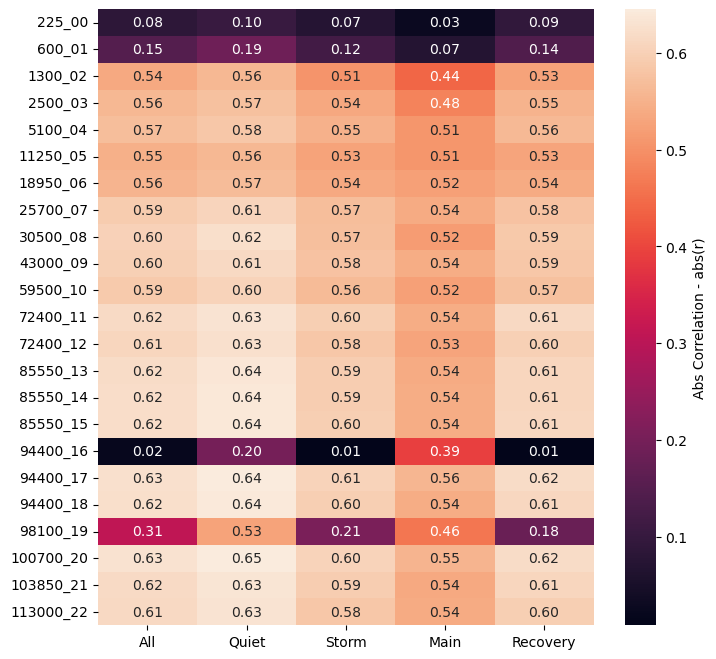

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(c_fism[0:-1].abs(),annot=True, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks(rotation=0) 
plt.show()

### Get a final set of columns to use as FISM features
These columns will be checked against eachother to remove highly correlated columns

In [11]:
# get a final set of columns for checking colinearity
fism_final = ['225_00', '600_01', '1300_02', '2500_03', '5100_04',
            '11250_05', '18950_06', '43000_09','85550_13', '85550_15',
            '94400_18', '103850_21']

In [12]:
c_omni = cor_matrix(df,omni_columns,dens_col,qt_t,st_t,mn_p,rc_p)

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Quiet'] = data[qt_t][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Storm'] = data[st_t][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Main'] = data[mn_p][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Recovery'] = data[rc_p][columns].dropna().corr()[dens_col]


<Figure size 800x800 with 0 Axes>

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'B'),
  Text(0, 1.5, 'Bx_GSEGSM'),
  Text(0, 2.5, 'By_GSE'),
  Text(0, 3.5, 'Bz_GSE'),
  Text(0, 4.5, 'By_GSM'),
  Text(0, 5.5, 'Bz_GSM'),
  Text(0, 6.5, 'Vsw'),
  Text(0, 7.5, 'Vx_GSE'),
  Text(0, 8.5, 'Vy_GSE'),
  Text(0, 9.5, 'Vz_GSE'),
  Text(0, 10.5, 'Prho'),
  Text(0, 11.5, 'Tp'),
  Text(0, 12.5, 'dynP'),
  Text(0, 13.5, 'Esw'),
  Text(0, 14.5, 'Beta'),
  Text(0, 15.5, 'AlfvenMach'),
  Text(0, 16.5, 'AE'),
  Text(0, 17.5, 'AL'),
  Text(0, 18.5, 'AU'),
  Text(0, 19.5, 'SYM_D index'),
  Text(0, 20.5, 'SYM_H index'),
  Text(0, 21.5, 'ASY_D index'),
  Text(0, 22.5, 'ASY_H index'),
  Text(0, 23.5, 'Goes Proton flux (>10 MeV)'),
  Text(0, 24.5, 'Goes Proton flux (>30 MeV)')])

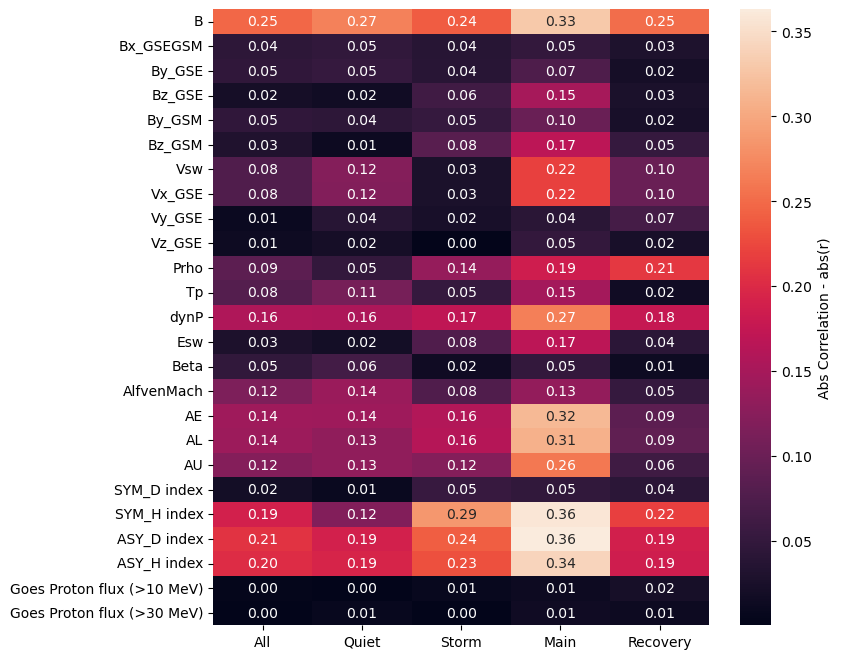

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(c_omni[0:-1].abs(),annot=True, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks() 
plt.show()

### Get a final set of OMNI columns

In [14]:
omni_final = ['B', 'dynP','AE', 'AL', 'AU', 'SYM_H index',
       'ASY_D index', 'ASY_H index']

In [15]:
c_goes = cor_matrix(df,goes_columns,dens_col,qt_t,st_t,mn_p,rc_p)
c_goes

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Quiet'] = data[qt_t][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Storm'] = data[st_t][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Main'] = data[mn_p][columns].dropna().corr()[dens_col]
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\109856557.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor_plot['Recovery'] = data[rc_p][columns].dropna().corr()[dens_col]


,All,Quiet,Storm,Main,Recovery
xrsa_flux_g15,0.022038,0.021359,0.024808,0.001138,0.035931
xrsb_flux_g15,0.067905,0.085256,0.055016,0.013156,0.073048
irr_1216,0.582378,0.603784,0.550492,0.501930,0.564081
dens_x,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 800x800 with 0 Axes>

<Axes: >

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'xrsa_flux_g15'),
  Text(0, 1.5, 'xrsb_flux_g15'),
  Text(0, 2.5, 'irr_1216')])

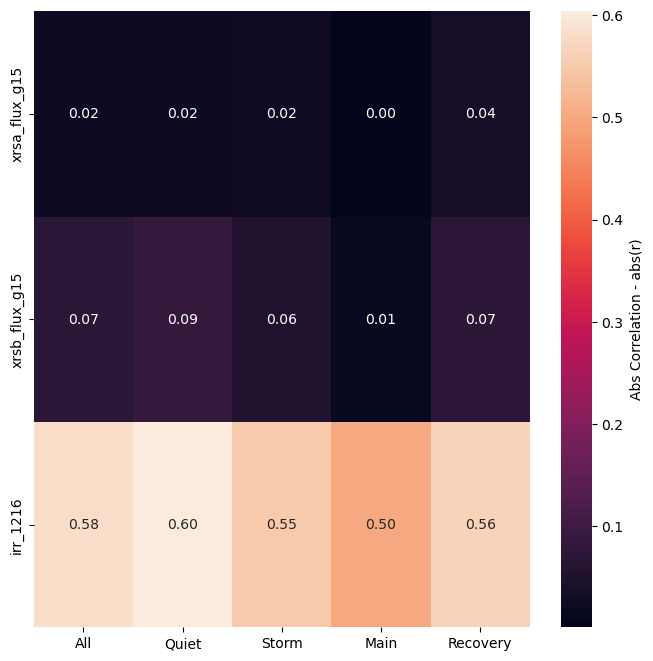

In [16]:
plt.figure(figsize=(8, 8))
sns.heatmap(c_goes[0:-1].abs(),annot=True, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks() 
plt.show()

### Get a final set of GOES columns

In [17]:
goes_final = ['irr_1216']

## Time Lagged Correlation

Investigate time lagged correlation for each of the data sets. 

- Time Lags
    - 5 min steps to 3 hours
    - 1 hour steps to two days
    - 6 hour steps to five days 
- Times
    - Quiet
    - Storm
    - Main
- Features
    - FISM features with GOES irr_1216
    - OMNI features

In [64]:
t_lag = np.arange(0,3*60,5)
t_lag = np.concatenate([t_lag,np.arange(t_lag[-1]+5,60*24*2,60)])
t_lag = np.concatenate([t_lag,np.arange(2*24*60,5*24*60+6*60,60*6)])
t_lag = np.concatenate([t_lag,np.arange(6*24*60,45*24*60+6*60,60*24)])
                 

In [65]:
solar_columns = fism_columns[:-2]+['irr_1216']+[dens_col]
solar_columns = fism_columns
t_col = 'DateTime'


In [66]:
df_dens = df[[t_col,dens_col]].copy()
df_sol = df[solar_columns].copy().drop(axis=1,columns=dens_col)

sol_dt = pd.DataFrame()
tol = pd.Timedelta('2.5 minute')

for dtx in t_lag:
    # shift the solar data set
    df_sol[t_col] = df_dens[t_col] - pd.Timedelta(f'{dtx} minute')
    cor_df = pd.merge_asof(left=df_dens,right=df_sol,on='DateTime',direction='nearest',tolerance=tol)

    seconds = dtx*60
    days = seconds // 86400
    seconds %= 86400
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60

    col = f'{days} {hours:02}:{minutes:02}'

    if not sol_dt.empty:
        sol_dt = sol_dt.merge(cor_df[solar_columns].dropna().corr()[dens_col].rename(col), 
                              how='left', left_index=True, right_index=True)
    else:
        sol_dt[col] = cor_df[solar_columns].dropna().corr()[dens_col].rename(col)

    

<Figure size 800x800 with 0 Axes>

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, '225_00'),
  Text(0, 1.5, '600_01'),
  Text(0, 2.5, '1300_02'),
  Text(0, 3.5, '2500_03'),
  Text(0, 4.5, '5100_04'),
  Text(0, 5.5, '11250_05'),
  Text(0, 6.5, '18950_06'),
  Text(0, 7.5, '25700_07'),
  Text(0, 8.5, '30500_08'),
  Text(0, 9.5, '43000_09'),
  Text(0, 10.5, '59500_10'),
  Text(0, 11.5, '72400_11'),
  Text(0, 12.5, '72400_12'),
  Text(0, 13.5, '85550_13'),
  Text(0, 14.5, '85550_14'),
  Text(0, 15.5, '85550_15'),
  Text(0, 16.5, '94400_16'),
  Text(0, 17.5, '94400_17'),
  Text(0, 18.5, '94400_18'),
  Text(0, 19.5, '98100_19'),
  Text(0, 20.5, '100700_20'),
  Text(0, 21.5, '103850_21'),
  Text(0, 22.5, '113000_22')])

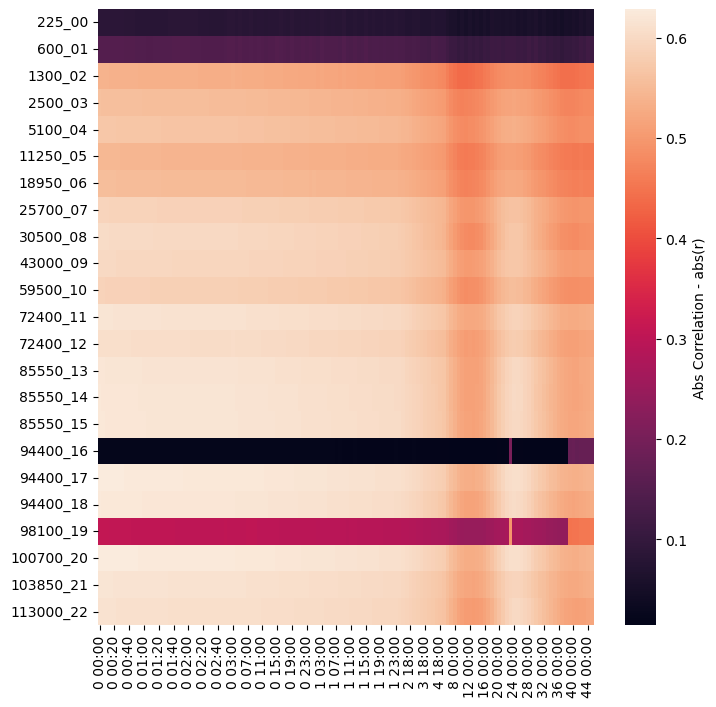

In [67]:
plt.figure(figsize=(8, 8))
sns.heatmap(sol_dt[0:-1].abs(),annot=False, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks() 
plt.show()

<Axes: xlabel='t'>

<Axes: xlabel='t'>

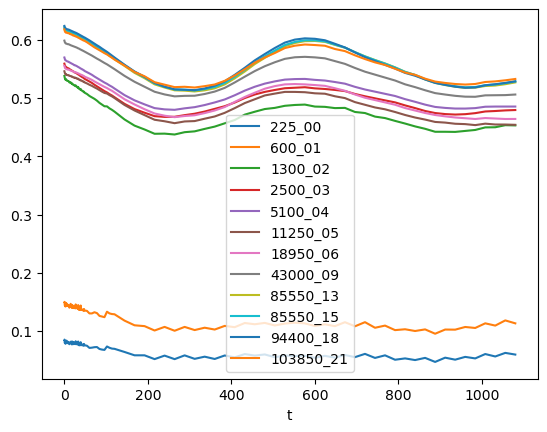

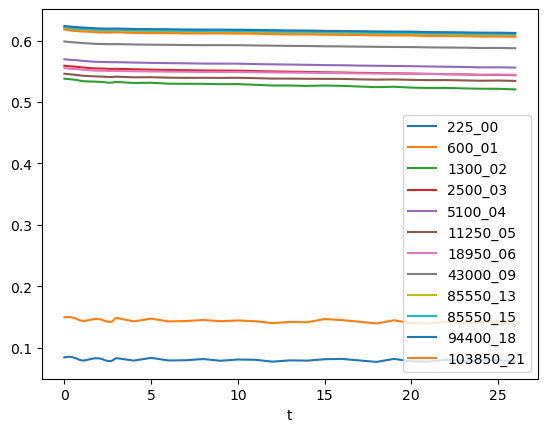

In [98]:
so_p = sol_dt.transpose()
so_p['t'] = t_lag/60

so_p.abs().plot(x='t',y=fism_final)
so_p[0:60].abs().plot(x='t',y=fism_final)

In [86]:
df_dens = df[st_t][[t_col,dens_col]].copy()
df_om = df[st_t][omni_columns].copy().drop(axis=1,columns=dens_col)

om_dt = pd.DataFrame()
tol = pd.Timedelta('2.5 minute')

for dtx in t_lag:
    # shift the solar data set
    df_om[t_col] = df_dens[t_col] - pd.Timedelta(f'{dtx} minute')
    cor_df = pd.merge_asof(left=df_dens,right=df_om,on='DateTime',direction='nearest',tolerance=tol)

    seconds = dtx*60
    days = seconds // 86400
    seconds %= 86400
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60

    col = f'{days} {hours:02}:{minutes:02}'

    if not om_dt.empty:
        om_dt = om_dt.merge(cor_df[omni_columns].dropna().corr()[dens_col].rename(col), 
                              how='left', left_index=True, right_index=True)
    else:
        om_dt[col] = cor_df[omni_columns].dropna().corr()[dens_col].rename(col)

C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\1669112046.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dens = df[st_t][[t_col,dens_col]].copy()
C:\Users\krmurph1\AppData\Local\Temp\ipykernel_34220\1669112046.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_om = df[st_t][omni_columns].copy().drop(axis=1,columns=dens_col)


<Figure size 800x800 with 0 Axes>

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'B'),
  Text(0, 1.5, 'Bx_GSEGSM'),
  Text(0, 2.5, 'By_GSE'),
  Text(0, 3.5, 'Bz_GSE'),
  Text(0, 4.5, 'By_GSM'),
  Text(0, 5.5, 'Bz_GSM'),
  Text(0, 6.5, 'Vsw'),
  Text(0, 7.5, 'Vx_GSE'),
  Text(0, 8.5, 'Vy_GSE'),
  Text(0, 9.5, 'Vz_GSE'),
  Text(0, 10.5, 'Prho'),
  Text(0, 11.5, 'Tp'),
  Text(0, 12.5, 'dynP'),
  Text(0, 13.5, 'Esw'),
  Text(0, 14.5, 'Beta'),
  Text(0, 15.5, 'AlfvenMach'),
  Text(0, 16.5, 'AE'),
  Text(0, 17.5, 'AL'),
  Text(0, 18.5, 'AU'),
  Text(0, 19.5, 'SYM_D index'),
  Text(0, 20.5, 'SYM_H index'),
  Text(0, 21.5, 'ASY_D index'),
  Text(0, 22.5, 'ASY_H index'),
  Text(0, 23.5, 'Goes Proton flux (>10 MeV)'),
  Text(0, 24.5, 'Goes Proton flux (>30 MeV)')])

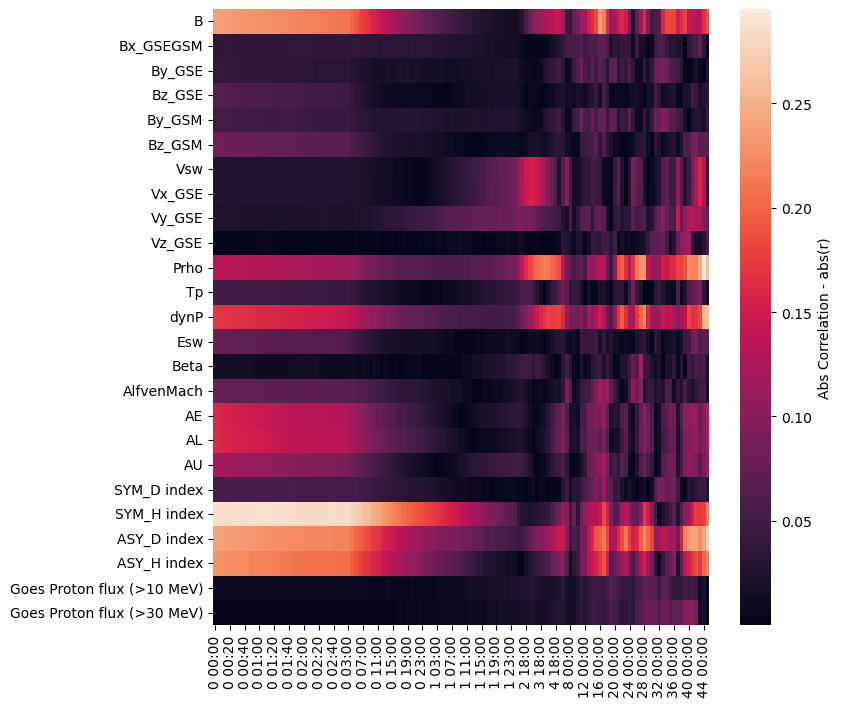

In [87]:
plt.figure(figsize=(8, 8))
sns.heatmap(om_dt[0:-1].abs(),annot=False, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks() 
plt.show()

<Axes: xlabel='t'>

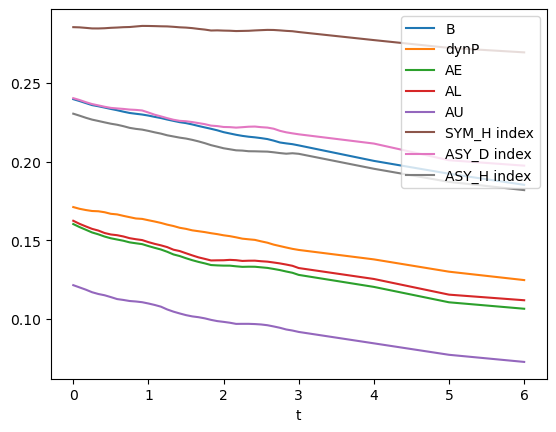

In [95]:
om_p = om_dt.transpose()
om_p['t'] = t_lag/60

om_p[0:40].abs().plot(x='t',y=omni_final)

## Final Feature and Colinearity

Compute the correlation matrix for the final set of features to identify features that may be highly correlated. 

In [23]:
feature_col = []
feature_col.append(fism_final)
feature_col.append(omni_final)
feature_col.append(goes_final)

feature_col = [
    x
    for xs in feature_col
    for x in xs
]
feature_col.append(dens_col)
feature_col

['225_00',
 '600_01',
 '1300_02',
 '2500_03',
 '5100_04',
 '11250_05',
 '18950_06',
 '43000_09',
 '85550_13',
 '85550_15',
 '94400_18',
 '103850_21',
 'B',
 'dynP',
 'AE',
 'AL',
 'AU',
 'SYM_H index',
 'ASY_D index',
 'ASY_H index',
 'irr_1216',
 'dens_x']

In [24]:
feature_cor = df[feature_col].dropna().corr()

<Figure size 1000x1000 with 0 Axes>

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, '225_00'),
  Text(0, 1.5, '600_01'),
  Text(0, 2.5, '1300_02'),
  Text(0, 3.5, '2500_03'),
  Text(0, 4.5, '5100_04'),
  Text(0, 5.5, '11250_05'),
  Text(0, 6.5, '18950_06'),
  Text(0, 7.5, '43000_09'),
  Text(0, 8.5, '85550_13'),
  Text(0, 9.5, '85550_15'),
  Text(0, 10.5, '94400_18'),
  Text(0, 11.5, '103850_21'),
  Text(0, 12.5, 'B'),
  Text(0, 13.5, 'dynP'),
  Text(0, 14.5, 'AE'),
  Text(0, 15.5, 'AL'),
  Text(0, 16.5, 'AU'),
  Text(0, 17.5, 'SYM_H index'),
  Text(0, 18.5, 'ASY_D index'),
  Text(0, 19.5, 'ASY_H index'),
  Text(0, 20.5, 'irr_1216'),
  Text(0, 21.5, 'dens_x')])

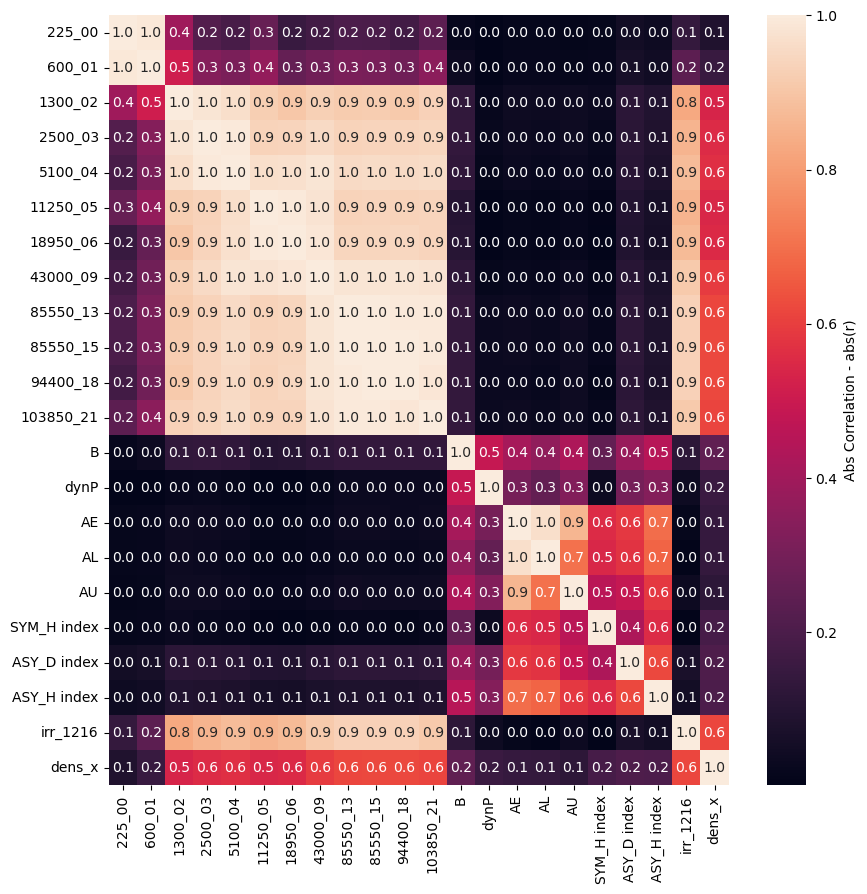

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(feature_cor.abs(),annot=True, fmt='.1f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks() 
plt.show()

In [26]:
df.columns

Index(['DateTime', 'DateTime_omni', 'Year', 'DOY', 'Hour', 'Minute', 'IMF_id',
       'SW_id', 'IMF_pt', 'SW_pt', 'Per_int', 'Timeshift', 'RMS_Timeshift',
       'RMS_PhaseFrontNormal', 'Time_btwn_observations', 'B', 'Bx_GSEGSM',
       'By_GSE', 'Bz_GSE', 'By_GSM', 'Bz_GSM', 'RMS_SD_B',
       'RMS_SD_field_vector', 'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho',
       'Tp', 'dynP', 'Esw', 'Beta', 'AlfvenMach', 'X(s/c), GSE', 'Y(s/c), GSE',
       'Z(s/c), GSE', 'BSN location, Xgse', 'BSN location, Ygse',
       'BSN location, Zgse', 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index', 'PC index', 'Na_Np Ratio',
       'MagnetosonicMach', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)',
       'DateTime_fism2', '225_00', '600_01', '1300_02', '2500_03', '5100_04',
       '11250_05', '18950_06', '25700_07', '30500_08', '43000_09', '59500_10',
       '72400_11', '72400_12', '85550_13', '85550_14', '85550_15', '

## Small Database

Create a small database of the features identified for us in a model. 

- Base features/required variables
    - dens_x, alt, lon, lat
    - mlat, mlon, mlt
    - DateTime
    - storm, storm phase
- FISM2
    - 2500_03, 4300_09, 85550_13
- OMNI
    - B, AE, Sym-H, ASY_D, ASY_H
- GOES
    - irr_1216





In [27]:
ff =  'C:\data\SatDensities\satdrag_database_grace_B_reduced_feature_v3.hdf5' 

cols = ['DateTime', 'B', 'AE', 'SYM_H index', 'ASY_D index', 'ASY_H index',
        '2500_03', '43000_09', '85550_13',
        'alt', 'lon', 'lat',
        'dens_x', 'dens_mean',
        'storm', 'storm phase', 
        'mlat', 'mlon', 'mlt',
        'irr_1216']

df_rf = df[cols].copy()
df_rf.to_hdf(ff,key='database', mode='w', format='table', complevel=7)